In [1]:
# imports
from pymongo import MongoClient
import pprint as p
from matplotlib import pyplot as plt

In [2]:
client = MongoClient()
# Like: use 'db' // chooses which database we are working with
db = client["tutorial"]
restaurants = db["restaurants"]

In [3]:
def numCuisine(cuisine: str):
    num = restaurants.count_documents({"cuisine": cuisine})
    return num

In [4]:
def numRestaurantsInBorough(borough: str):
    num = restaurants.count_documents({"borough": borough})
    return num

In [5]:
def restaurantsInEachBorough():
    pipeline = [
        {"$group": {"_id": "$borough", "num": {"$sum": 1}}},
        {"$sort": {"num": -1}}
    ]
    
    result = list(db.restaurants.aggregate(pipeline))
    return result

In [6]:
def restaurntTypesInBorough(cuisine: str):
    pipeline = [
        {"$match": {"cuisine": cuisine, "borough":{"$ne": "Missing"} }},
        {"$group": {"_id": "$borough", "num": {"$sum": 1}}},
        {"$sort": {"num": -1}}
    ]
    
    result = list(db.restaurants.aggregate(pipeline))
    return result

In [7]:
def leastCaribbeanInBorough():
    pipeline = [
        {"$match": {"cuisine": "Caribbean", "borough":{"$ne": "Missing"}}},
        {"$group": {"_id": "$borough", "num": {"$sum": 1}}},
        {"$sort": {"num": 1}},
        {"$limit" : 3}
    ]
    
    result = list(db.restaurants.aggregate(pipeline))
    return result

In [8]:
def cuisineInZipcodes(cuisine: str, zipcodes: list):
    zipcodes = [str(zipcode) for zipcode in zipcodes]
    pipeline = [
        {"$match": {"cuisine": cuisine, "address.zipcode": {"$in": zipcodes}}},
        {"$group": {"_id": None, "count": {"$sum": 1}}}
    ]

    result = list(db.restaurants.aggregate(pipeline))
    return result


In [9]:
def highestCuisineAvgScoreInBorough(cuisine: str, borough: str):
    pipeline = [
        {"$match": {"cuisine": cuisine, "borough": borough}},
        {"$unwind": "$grades"},
        {"$group": {"_id": "$name", "avgScore": {"$avg": "$grades.score"}}},
        {"$sort": {"avgScore": -1}},
        {"$limit": 5}
    ]

    result = list(db.restaurants.aggregate(pipeline))
    return result

In [10]:
def mostGradeACountInBorough(borough: str):
    pipeline = [
        {"$match": {"borough": "Manhattan"}},
        {"$unwind": "$grades"},
        {"$group": {
            "_id": "$name",
            "a_gradeCount": {
                "$sum": {
                    "$cond": {
                        "if": {"$eq": ["$grades.grade", 'A']},
                        "then": 1,
                        "else": 0
                    }
                }
            }
        }},
        {"$sort": {"a_gradeCount": -1}},
        {"$limit": 10}
    ]

    result = list(db.restaurants.aggregate(pipeline))
    return result

In [11]:
# How many Italian cuisine restaurants are there in total? 
p.pprint(numCuisine('Italian'))

1069


In [12]:
# How many restaurants are there in the Bronx?
p.pprint(numRestaurantsInBorough("Bronx"))

2338


In [13]:
# How many restaurants are there in each borough?
p.pprint(restaurantsInEachBorough())

[{'_id': 'Manhattan', 'num': 10259},
 {'_id': 'Brooklyn', 'num': 6086},
 {'_id': 'Queens', 'num': 5656},
 {'_id': 'Bronx', 'num': 2338},
 {'_id': 'Staten Island', 'num': 969},
 {'_id': 'Missing', 'num': 51}]


[{'_id': 'Manhattan', 'num': 3205},
 {'_id': 'Brooklyn', 'num': 1273},
 {'_id': 'Queens', 'num': 1040},
 {'_id': 'Bronx', 'num': 411},
 {'_id': 'Staten Island', 'num': 244}]


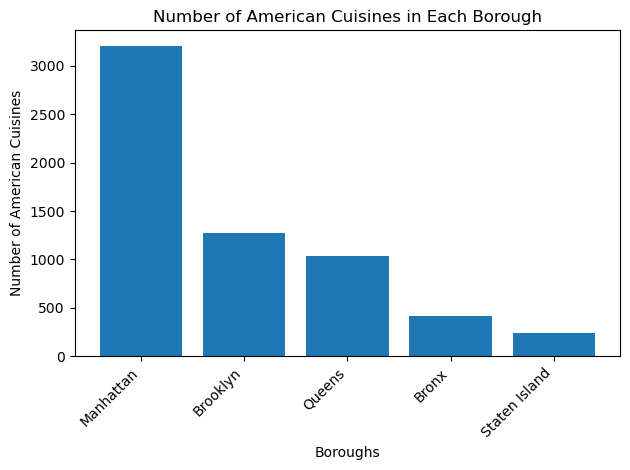

In [14]:
# How many American cuisines are there in each borough?
result = restaurntTypesInBorough("American")
p.pprint(result)

x = [item['_id'] for item in result]
y = [item['num'] for item in result]

plt.bar(x, y)
plt.xlabel('Boroughs')
plt.ylabel('Number of American Cuisines')
plt.title('Number of American Cuisines in Each Borough')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[{'_id': 'Staten Island', 'num': 3},
 {'_id': 'Manhattan', 'num': 36},
 {'_id': 'Bronx', 'num': 110}]


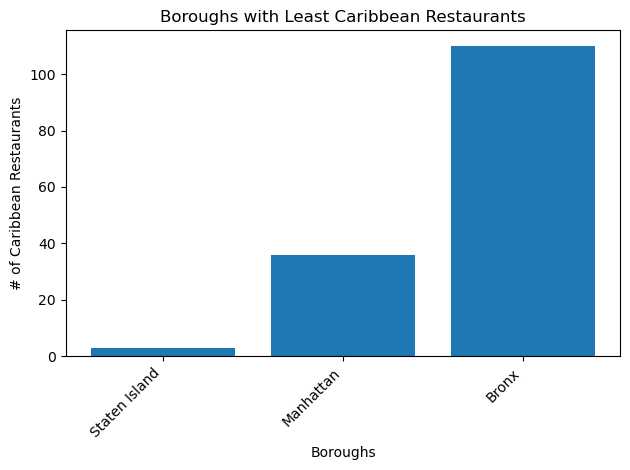

In [15]:
# Which 3 boroughs have the least Caribbean restaurants?
result = leastCaribbeanInBorough()
p.pprint(result)

x = [item['_id'] for item in result]
y = [item['num'] for item in result]

plt.bar(x, y)
plt.xlabel('Boroughs')
plt.ylabel('# of Caribbean Restaurants')
plt.title('Boroughs with Least Caribbean Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# How many pizza restaurants are there in the zip codes 10013 and 10023?
p.pprint(cuisineInZipcodes("Pizza", [10013, 10023]))

[{'_id': None, 'count': 13}]


[{'_id': 'Celebrate At Snug Harbor', 'avgScore': 39.0},
 {'_id': 'Bagels On The Island', 'avgScore': 26.5},
 {'_id': "Chili'S Grill & Bar", 'avgScore': 26.0},
 {'_id': '1734 Victory Boulevard,Inc.', 'avgScore': 24.0},
 {'_id': 'Holiday Inn', 'avgScore': 24.0}]


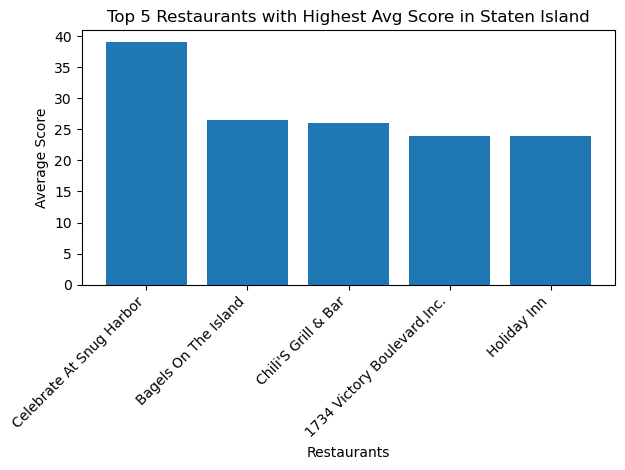

In [17]:
# Which 5 American restaurants have the highest average score in Staten Island?
result = highestCuisineAvgScoreInBorough('American', 'Staten Island')
p.pprint(result)

x = [item['_id'] for item in result]
y = [item['avgScore'] for item in result]

plt.bar(x, y)
plt.xlabel('Restaurants')
plt.ylabel('Average Score')
plt.title('Top 5 Restaurants with Highest Avg Score in Staten Island')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[{'_id': 'Starbucks Coffee', 'a_gradeCount': 658},
 {'_id': 'Subway', 'a_gradeCount': 493},
 {'_id': "Mcdonald'S", 'a_gradeCount': 232},
 {'_id': 'Dunkin Donuts', 'a_gradeCount': 187},
 {'_id': "Dunkin' Donuts", 'a_gradeCount': 165},
 {'_id': 'Chipotle Mexican Grill', 'a_gradeCount': 153},
 {'_id': 'Pret A Manger', 'a_gradeCount': 139},
 {'_id': 'Le Pain Quotidien', 'a_gradeCount': 109},
 {'_id': 'Hale & Hearty Soups', 'a_gradeCount': 82},
 {'_id': 'Au Bon Pain', 'a_gradeCount': 80}]


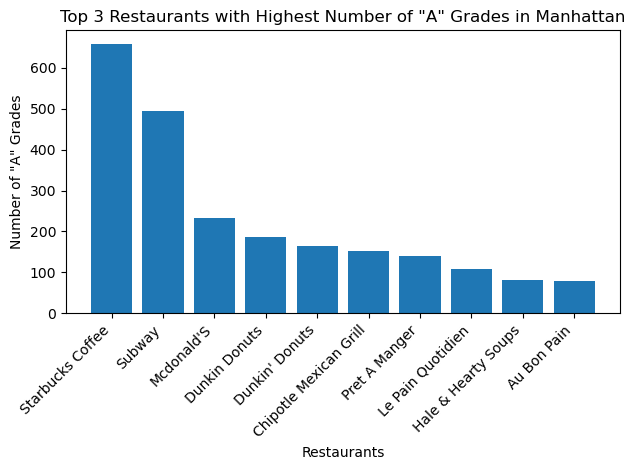

In [18]:
#  List the top 10 restaurants in Manhattan with most grade A’s
result = mostGradeACountInBorough('Manhattan')
p.pprint(result)

x = [item['_id'] for item in result]
y = [item['a_gradeCount'] for item in result]

plt.bar(x, y)
plt.xlabel('Restaurants')
plt.ylabel('Number of "A" Grades')
plt.title('Top 3 Restaurants with Highest Number of "A" Grades in Manhattan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()